In [1]:
import numpy as np
import pandas as pd
import collections

In [2]:
cha = pd.read_csv('./data_CHA.csv')
cha_stars = collections.Counter(cha['stars'])
cha_stars = dict(sorted(cha_stars.items()))
cha_distrib = [x / sum(cha_stars.values()) for x in cha_stars.values()]

In [3]:
cal = pd.read_csv('./data_CAL.csv')
cal_stars = collections.Counter(cal['stars'])
cal_stars = dict(sorted(cal_stars.items()))
cal_distrib = [x / sum(cal_stars.values()) for x in cal_stars.values()]

In [4]:
pho = pd.read_csv('./data_PHO.csv')
pho_stars = collections.Counter(pho['stars'])
pho_stars = dict(sorted(pho_stars.items()))
pho_distrib = [x / sum(pho_stars.values()) for x in pho_stars.values()]

In [5]:
cha_distrib

[0.005969721572185873,
 0.020201537800276996,
 0.06375662639094512,
 0.12235541334352165,
 0.19857681837719088,
 0.24528391995797316,
 0.22918955059936005,
 0.08582071732174411,
 0.02884569463680214]

In [6]:
def to_pdf(dis):
    sum = 0
    for i in range(len(dis)):
        sum += dis[i]
        dis[i] = sum
    return dis

In [7]:
cha_pdf = to_pdf(cha_distrib)
cal_pdf = to_pdf(cal_distrib)
pho_pdf = to_pdf(pho_distrib)

In [8]:
cha_pdf

[0.005969721572185873,
 0.02617125937246287,
 0.08992788576340799,
 0.21228329910692964,
 0.41086011748412055,
 0.6561440374420937,
 0.8853335880414538,
 0.9711543053631979,
 1.0]

In [9]:
cal_pdf

[0.0023000707714083512,
 0.01521585279547063,
 0.09819532908704884,
 0.2075371549893843,
 0.43683651804670914,
 0.6951521585279548,
 0.9010969568294409,
 0.9738145789101204,
 1.0]

In [10]:
pho_pdf

[0.007162120341305982,
 0.024094787567973827,
 0.08682965648348734,
 0.22295415358769177,
 0.43675670896149255,
 0.6459171492992617,
 0.8853618639197135,
 0.9755073168575091,
 1.0]

In [16]:
output = pd.DataFrame({'rating':np.arange(1.0,5.5,0.5),
                        'CHA' : cha_pdf,
                        'CAL' : cal_pdf,
                        'PHO' : pho_pdf }, 
                        columns=['rating','CHA','CAL', 'PHO'])

In [17]:
output

,rating,CHA,CAL,PHO
0,1.0,0.005970,0.002300,0.007162
1,1.5,0.026171,0.015216,0.024095
2,2.0,0.089928,0.098195,0.086830
3,2.5,0.212283,0.207537,0.222954
4,3.0,0.410860,0.436837,0.436757
5,3.5,0.656144,0.695152,0.645917
6,4.0,0.885334,0.901097,0.885362
7,4.5,0.971154,0.973815,0.975507
8,5.0,1.000000,1.000000,1.000000


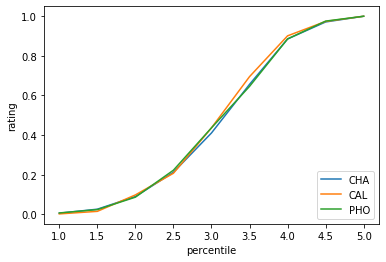

In [21]:

import matplotlib.pyplot as plt

x_range = np.arange(1.0, 5.5, step=0.5)

plt.plot(x_range, cha_pdf, label = 'CHA')
plt.plot(x_range, cal_pdf, label = 'CAL')
plt.plot(x_range, pho_pdf, label = 'PHO')
    
plt.xlabel('percentile')
plt.ylabel('rating')
plt.legend(loc='lower right')

plt.show()

In [18]:
output.to_csv('./rating distribution.csv')